In [100]:
import numpy as np
import qnm_filter
import qnm
from scipy.special import logsumexp
from pathlib import Path
import matplotlib.pyplot as pl
import scipy as sp
import re
import glob
import os
from natsort import natsorted
import matplotlib

red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'
color_arr = [red, blue, green, yellow, purple, orange]

mplparams = {
    'text.usetex': True,
    # 'axes.linewidth': 3,
    'lines.linewidth' : 1.5,
    'lines.markersize' : 10,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 36,
    'figure.figsize': (15,10),
    'legend.fontsize': 26,
    'legend.handlelength' : 2,
    'legend.numpoints' : 1,
    'axes.grid' : True,
    'grid.alpha' : 0.9,
    'axes.prop_cycle': matplotlib.cycler(color=color_arr) 
}
matplotlib.rcParams.update(mplparams)

In [101]:
# pvalues (220,220+221,220+210,220+200,220+330,220+440) and corresponding det_stats
results = np.loadtxt("results/pvalue_SNR221=15.9_ALL.dat")

In [102]:
[pvalue_220,pvalue_220221,pvalue_220210,pvalue_220200,pvalue_220330,pvalue_220440, \
detStat_220221,detStat_220210,detStat_220200,detStat_220330,detStat_220440] = results.T

In [103]:
np.count_nonzero(detStat_220200>2.7876839653599252)/len(detStat_220221)

0.9748743718592965

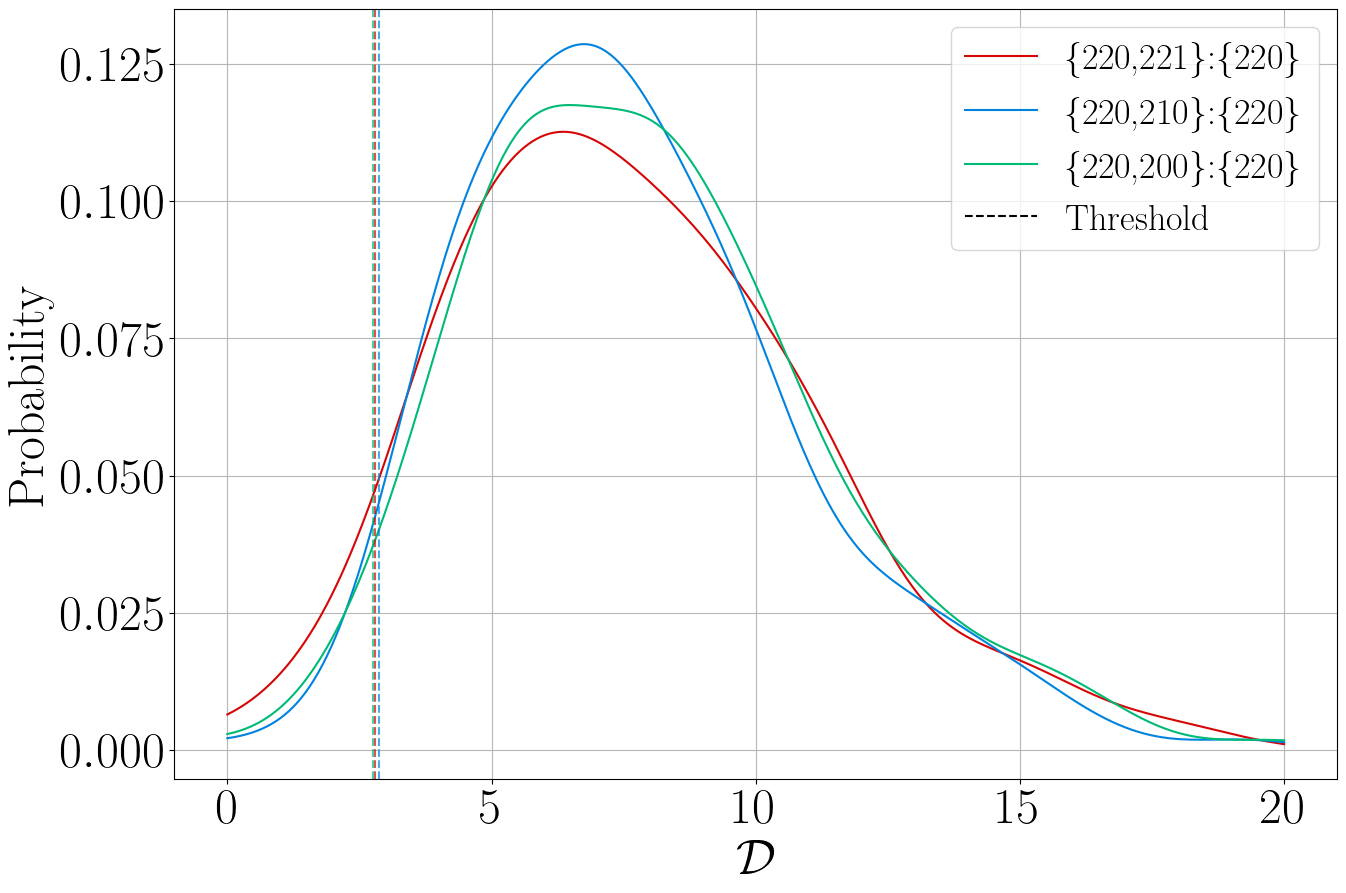

In [104]:
from scipy.stats import gaussian_kde
alpha = 1.0

def plot_kde(data, label, alpha):
    kde = gaussian_kde(data)
    
    # Define x-range based on data range with a small margin
    x_min, x_max = 0, 20
    x_range = np.linspace(x_min, x_max, 500)

    pl.plot(x_range, kde(x_range), label=label, alpha=alpha)

plot_kde(detStat_220221,  label='\{220,221\}:\{220\}', alpha=alpha)
plot_kde(detStat_220210,  label='\{220,210\}:\{220\}', alpha=alpha)
plot_kde(detStat_220200,  label='\{220,200\}:\{220\}', alpha=alpha)
pl.axvline(2.7876839653599252, c=red, ls='--', alpha=0.7)
pl.axvline(6.63/np.log(10), c=blue, ls='--', alpha=0.7)
pl.axvline(6.34/np.log(10), c=green, ls='--', alpha=0.7)
pl.plot(np.nan, np.nan, c='k', ls='--', label="Threshold")
# plot_kde(detStat_220330,  label='\{220,330\}:\{220\}', alpha=alpha)
# plot_kde(detStat_220440,  label='220+440', alpha=alpha)

pl.legend()
pl.xlabel('$\mathcal{D}$')
pl.ylabel('Probability')
pl.savefig("plots/det_stat_diff_modes.pdf")

In [105]:
fig = pl.gcf()  # Get current figure
print(fig.get_size_inches())

[15. 10.]


<Figure size 1500x1000 with 0 Axes>

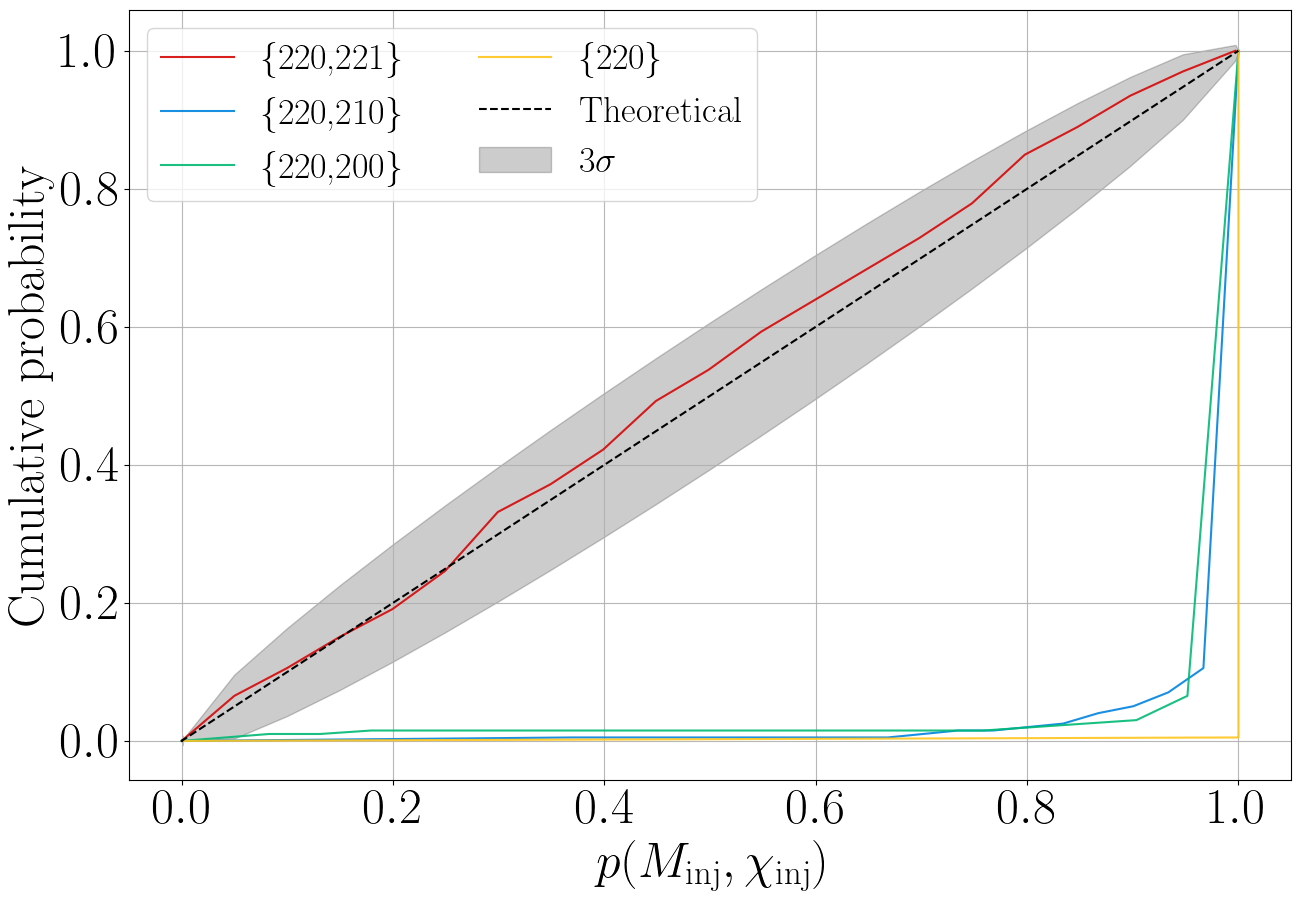

In [108]:
alpha = 0.9
bins = 20  # Adjust this if needed

def plot_line_hist(data, label, alpha):
    counts, bin_edges = np.histogram(data, bins=bins)
    bin_centers = bin_edges[1:] #(bin_edges[:-1] + bin_edges[1:]) / 2
    cumulative = np.cumsum(counts) / len(data)

    # Prepend (0, 0) to ensure origin is included
    bin_centers = np.insert(bin_centers, 0, 0)
    cumulative = np.insert(cumulative, 0, 0)

    pl.plot(bin_centers, cumulative, label=label, alpha=alpha)
    return bin_centers, cumulative

bin_centers, density = plot_line_hist(pvalue_220221, label='\{220,221\}', alpha=alpha)
_, _ = plot_line_hist(pvalue_220210, label='\{220,210\}', alpha=alpha)
plot_line_hist(pvalue_220200, label='\{220,200\}', alpha=alpha)
# _, _ = plot_line_hist(pvalue_220330, label='\{220,330\}', alpha=alpha)
# plot_line_hist(pvalue_220440, label='220+440', alpha=alpha)
_, _ = plot_line_hist(pvalue_220,     label='\{220\}',     alpha=alpha)
bin_centers = np.insert(bin_centers,[0, bin_centers.size],[0.001,1])

pl.plot(bin_centers, bin_centers, c='k', ls = '--', label='Theoretical')
std =  np.sqrt(bin_centers * (1 - bin_centers)) / np.sqrt(len(pvalue_220221))
pl.fill_between(bin_centers, bin_centers - 3*std, bin_centers + 3*std, alpha=0.2, color = 'k', label='3$\sigma$')

pl.legend(ncol=2)
pl.xlabel('$p(M_\mathrm{inj}, \chi_\mathrm{inj})$')
pl.ylabel('Cumulative probability')
# pl.tight_layout()
pl.savefig("plots/pp_plot_220+221.pdf")

In [90]:
fig = pl.gcf()  # Get current figure
print(fig.get_size_inches())

[15. 10.]


<Figure size 1500x1000 with 0 Axes>